# [Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/abs/1409.1556)

In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Input,
    Conv2D,
    MaxPooling2D)

from tensorflow.keras.utils import plot_model

In [2]:
def vgg_block(layer_in, n_filters, n_conv):
    """
    stack of conv layers having same # of filters
    followed by a max pooling with stride of 2
    """
    for _ in range(n_conv):
        layer_in = Conv2D(n_filters, 
                          (3,3),
                          padding='same',
                          activation='relu')(layer_in)
        
    layer_in = MaxPooling2D((2,2), strides=(2,2))(layer_in)
    return layer_in

In [3]:
visible = Input(shape=(256,256,3))
layer = vgg_block(visible, 64, 2)
layer = vgg_block(layer, 128, 2)
layer = vgg_block(layer, 256, 4)

model = Model(inputs=visible, outputs=layer)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 128)       0     

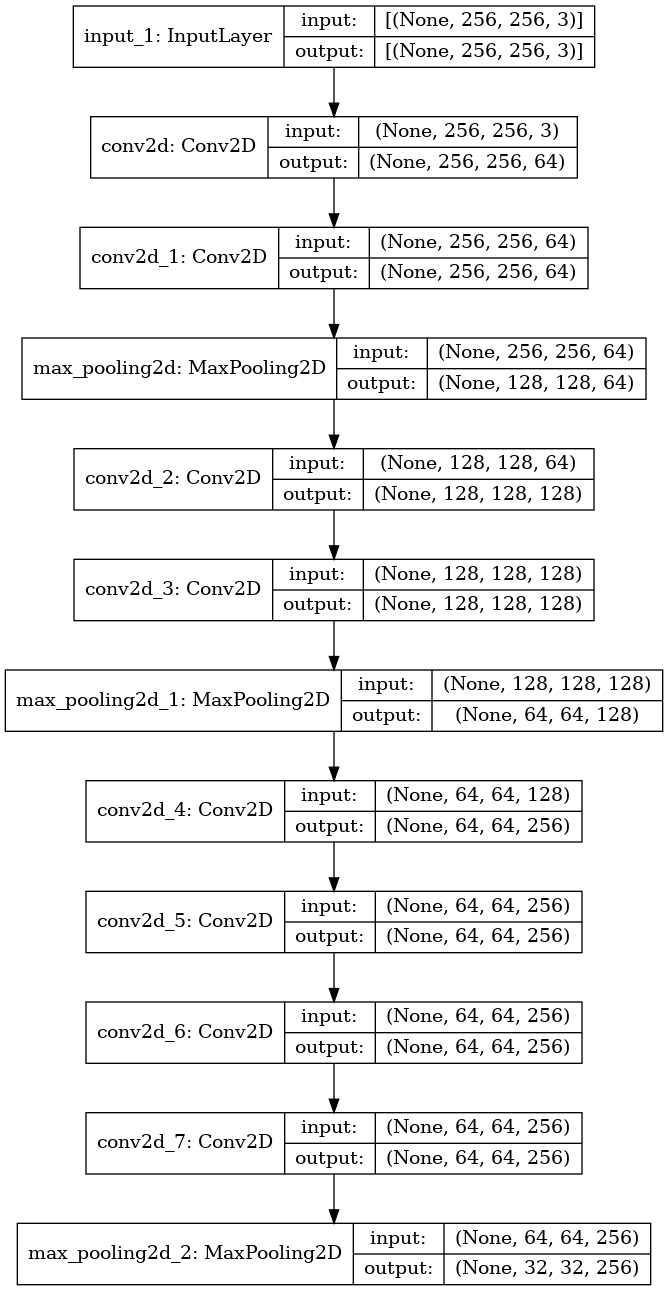

In [4]:
plot_model(model, show_shapes=True, to_file='vgg_blocks.png')